<a href="https://colab.research.google.com/github/sprucesunday777/nsisong-data-science/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


About Dataset
Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.


Attributes information

1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6) fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11) the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Exploratory data analysis

In [ ]:
df.describe ()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There was no missing value in the data set

In [ ]:
df['target'].value_counts ()

1    165
0    138
Name: target, dtype: int64

People with heart disease were more than people without heart disease

<AxesSubplot:xlabel='target', ylabel='count'>

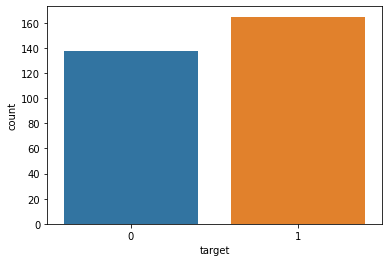

In [ ]:
sns.countplot(data=df,x='target')

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

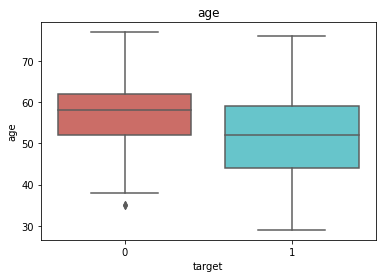

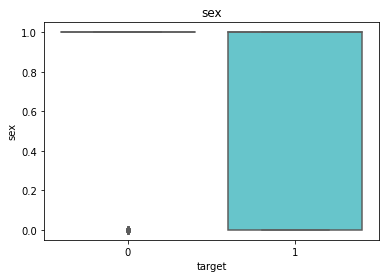

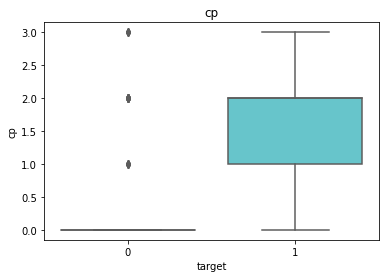

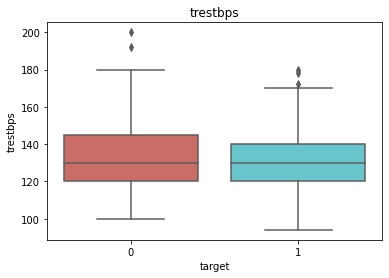

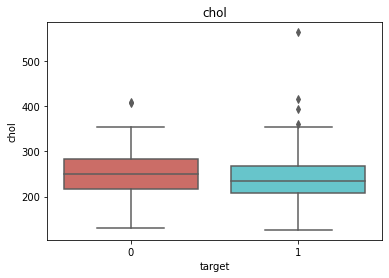

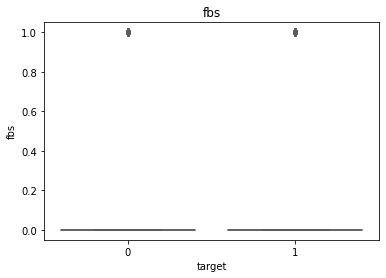

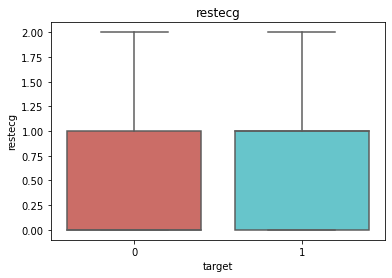

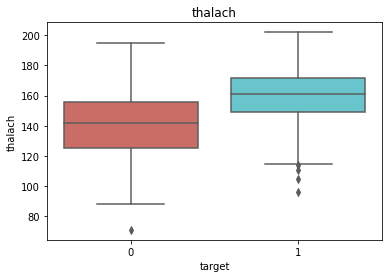

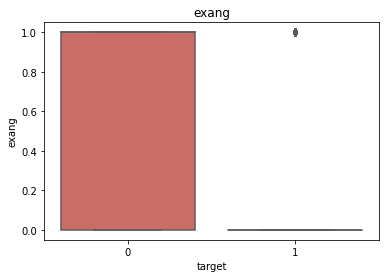

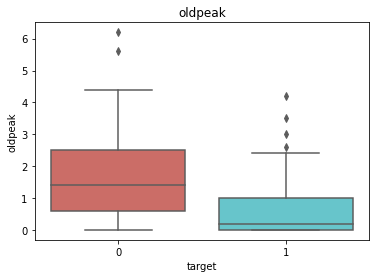

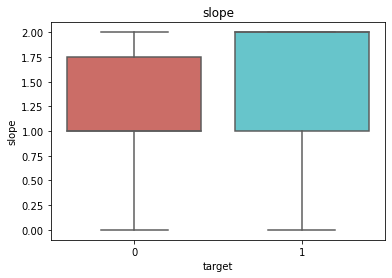

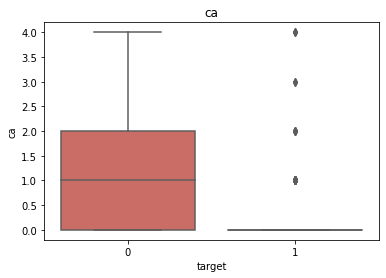

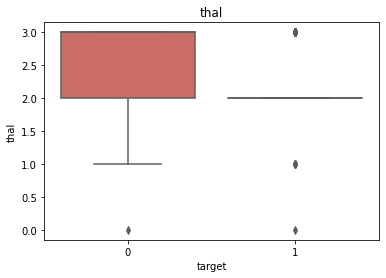

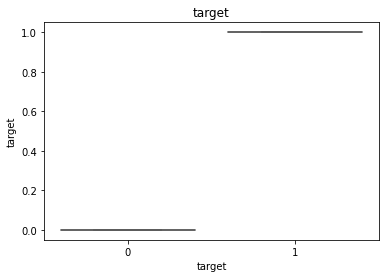

In [ ]:
for column in df.columns:
    sns.boxplot(y=column, data=df, x='target',palette='hls')
    plt.title(column)
    plt.show()

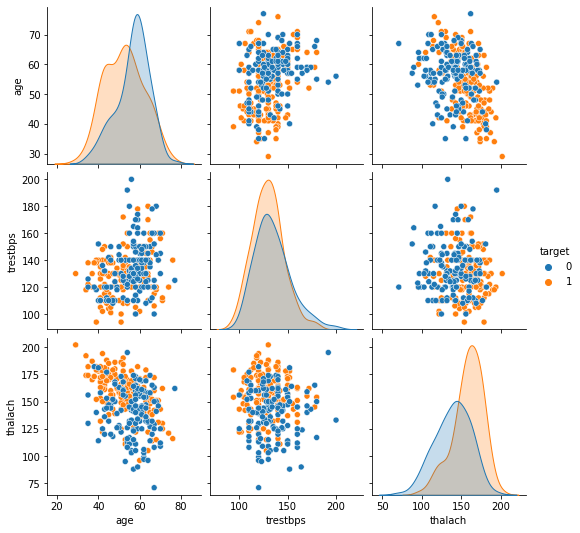

In [ ]:
sns.pairplot(df[['age','trestbps', 'thalach', 'target']],hue='target')

<AxesSubplot:>

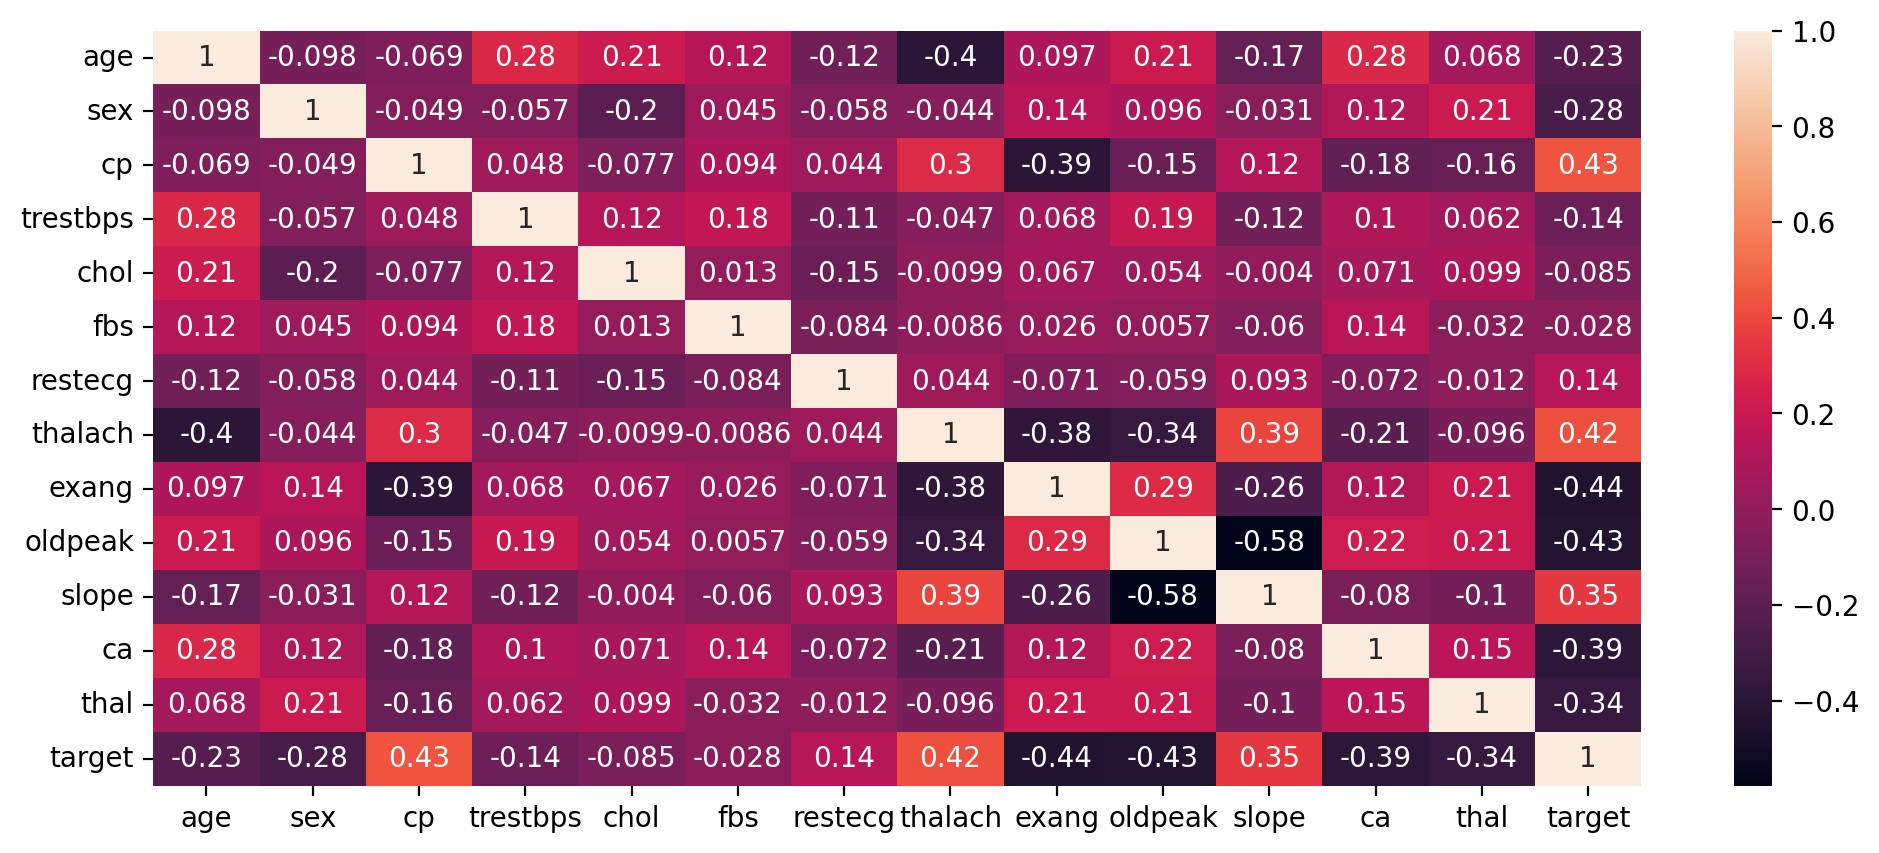

In [ ]:
plt.figure(figsize=(12,5),dpi=200)
sns.heatmap(df.corr(),annot=True)

Since out data was imbalance, we have to filter out the outliers

In [ ]:
# Define the columns to filter
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
# Calculate the IQR for each column
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df1 = df[~((df[columns] < (Q1 - 1.5 * IQR)) |(df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the original and filtered data shape
print("Original df shape:", df.shape)
print("Filtered df1 shape:", df1.shape)

Original df shape: (303, 14)
Filtered df1 shape: (228, 14)


We know split our data to labels and features

In [ ]:
x=df.drop('target',axis=1)
y=df['target']

we split it into testing and training at ratio of 1:9

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler as ss

In [ ]:
scaler=ss()

In [ ]:
scaled_x_train=scaler.fit_transform(x_train)

In [ ]:
scaled_x_test=scaler.transform (x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model=LogisticRegression()

In [ ]:
!pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor
import graphviz

In [ ]:
# Splitting our data into a train and test set

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size= .20,random_state=123)
classifiers = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

models,predictions = classifiers.fit(X_train, X_test, y_train, y_test)

print(models)

In [ ]:
log_model.fit(scaled_x_train,y_train)

LogisticRegression()

In [ ]:
log_model.coef_

array([[-0.07200459, -0.73512355,  0.89380134, -0.26263404, -0.21252883,
         0.04626827,  0.12005867,  0.4336183 , -0.42815523, -0.5261547 ,
         0.38193418, -0.85118686, -0.57463534]])

In [ ]:
y_predict=log_model.predict (scaled_x_test)

In [ ]:
y_predict

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
log_model.predict_proba(scaled_x_test)

array([[0.99618465, 0.00381535],
       [0.19069335, 0.80930665],
       [0.25641935, 0.74358065],
       [0.02253428, 0.97746572],
       [0.98371679, 0.01628321],
       [0.13192483, 0.86807517],
       [0.06081781, 0.93918219],
       [0.9878546 , 0.0121454 ],
       [0.96685378, 0.03314622],
       [0.18898351, 0.81101649],
       [0.97836627, 0.02163373],
       [0.25118007, 0.74881993],
       [0.95358375, 0.04641625],
       [0.61600215, 0.38399785],
       [0.08371442, 0.91628558],
       [0.18382638, 0.81617362],
       [0.01208058, 0.98791942],
       [0.22484675, 0.77515325],
       [0.16024771, 0.83975229],
       [0.99254465, 0.00745535],
       [0.99338129, 0.00661871],
       [0.36079277, 0.63920723],
       [0.34161569, 0.65838431],
       [0.26029251, 0.73970749],
       [0.62615436, 0.37384564],
       [0.03489791, 0.96510209],
       [0.98536563, 0.01463437],
       [0.27038752, 0.72961248],
       [0.9753323 , 0.0246677 ],
       [0.96161933, 0.03838067],
       [0.

This actually tells the probability of having a heart disease or not

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,y_predict)

0.8387096774193549

0.83 accuracy score tell thatt our model is working fine

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


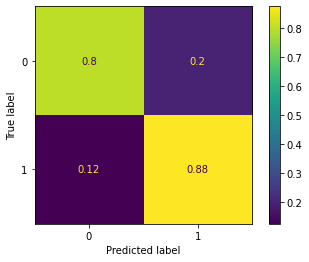

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model,scaled_x_test,y_test,normalize='true')

In [ ]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

In [ ]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


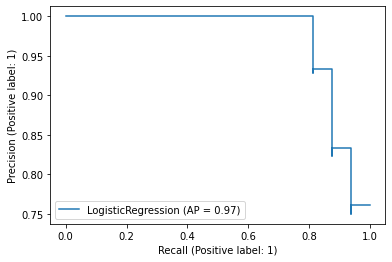

In [ ]:
plot_precision_recall_curve(log_model,scaled_x_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


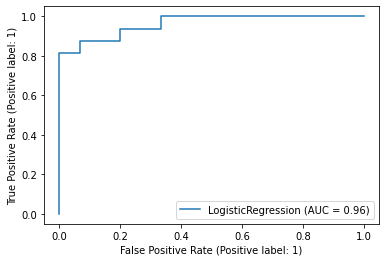

In [ ]:
plot_roc_curve(log_model,scaled_x_test,y_test)